In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from src.data import load_img, save_imgs_list_2npy, SatelliteImagesDataset
from src import data
from src.preprocessing import CropImage

import cv2 as cv
import time
import IPython
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
img_path = "/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020/"

img_names = np.array([img for img in os.listdir(img_path)])
print("Number of images in 2020: ", img_names.size)

for idx in range(img_names.size - 1):
    nmbr_of_chars = len(img_names[idx]) == len(img_names[idx + 1]) 

print("Filenames length: ", len(img_names[idx]))
print("All images filenames has the same amount of characters:", nmbr_of_chars)


Number of images in 2020:  51219
Filenames length:  21
All images filenames has the same amount of characters: True


In [4]:
# Images names are as follow: ART_yyyydoy_hhmmss.FR

year, doy, hs, mins, sec = [], [], [], [], []


for img_name in img_names:
    yyyydoy, hhmmss = img_name.split("_")[1], img_name.split("_")[2][:6]

    year.append(int(yyyydoy[:4]))
    doy.append(int(yyyydoy[4:]))

    hs.append(int(hhmmss[:2]))
    mins.append(int(hhmmss[2:4]))
    sec.append(int(hhmmss[4:]))

year, doy, hs, mins, sec = np.array(year), np.array(doy), np.array(hs), np.array(mins), np.array(sec)

In [5]:
doy_wo_duplicates = list(dict.fromkeys(doy))
doy_sorted = np.sort(doy_wo_duplicates)
print("Amount of days in the 2020 dataset: ", len(doy_sorted))

Amount of days in the 2020 dataset:  359


In [6]:
mins_of_year = doy*24*60 + hs*60 + mins
sort_idxs = np.argsort(mins_of_year)

doy_sorted = doy[sort_idxs]

# List with sorted images by day, hour and mins
img_names_sorted = img_names[sort_idxs]


days_list = ['-']
img_per_day = [-1]

for nth_day in range(1, 367):
    nth_day_idxs = np.where(doy_sorted == nth_day)[0]
    if nth_day_idxs.size != 0:
        days_list.append(list(img_names_sorted[nth_day_idxs]))
        img_per_day.append(len(list(img_names_sorted[nth_day_idxs])))
    else:
        days_list.append([])
        img_per_day.append(0)


In [7]:
dic = {
    "Images per day":   img_per_day[1:],
    "Ordered list of images per dar": days_list[1:]
}

dataset_df = pd.DataFrame(dic, columns=dic.keys())
dataset_df.index = [i for i in range(1, 367)]
dataset_df




,Images per day,Ordered list of images per dar
1,144,"[ART_2020001_000021.FR, ART_2020001_001021.FR,..."
2,144,"[ART_2020002_000021.FR, ART_2020002_001021.FR,..."
3,144,"[ART_2020003_000021.FR, ART_2020003_001021.FR,..."
4,144,"[ART_2020004_000021.FR, ART_2020004_001021.FR,..."
5,144,"[ART_2020005_000021.FR, ART_2020005_001021.FR,..."
...,...,...
362,144,"[ART_2020362_000021.FR, ART_2020362_001021.FR,..."
363,144,"[ART_2020363_000021.FR, ART_2020363_001021.FR,..."
364,144,"[ART_2020364_000021.FR, ART_2020364_001021.FR,..."
365,144,"[ART_2020365_000021.FR, ART_2020365_001021.FR,..."


In [22]:
# Save days of images to npy within folders, do not run for existing days

# days = [i for i in range(1, 11)] # first 10 days of 2020
# day_imgs_list = []
# for day in days:
#     day_imgs_list += dataset_df.iloc[day-1][1]

# print(len(day_imgs_list))
# save_imgs_list_2npy(imgs_list=day_imgs_list,
#             meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta',
#             mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020',
#             img_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020')





1376


<BarContainer object of 144 artists>

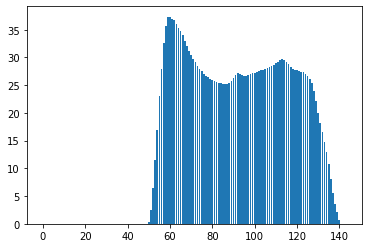

In [12]:
# Plot the mean values of images from day 1 to see night images

dataset = SatelliteImagesDataset(root_dir='data/images/dia_1')

mean_vals = []
for i, sample in enumerate(dataset):
    mean_vals.append(np.mean(sample['image']))
    
#print(mean_vals)

fig, ax = plt.subplots()

plt.bar([i for i in range(len(mean_vals))], mean_vals)

In [38]:
# This cell counts the amout of images with mean value cero by day of the 2020 dataset

## Do not uncomment these lines, took around 5 hours to complete
# tot_black_imgs = 0
# black_imgs_col_dt = []
# nthday_black_imgs_list = []
# for day in dataset_df.index: # starts at 1
#     for img_name in dataset_df.iloc[day-1][1]:
#         image = load_img(meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta',
#                         img_name=img_name,
#                         mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020',
#                         img_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020')
#         if np.mean(image) == 0:
#             tot_black_imgs += 1
#             nthday_black_imgs_list.append(img_name)
#     black_imgs_col_dt.append(nthday_black_imgs_list)
#     nthday_black_imgs_list = []

# dataset_df['Black images list'] = black_imgs_col_dt
print(dataset_df)



     Images per day                     Ordered list of images per dar  \
1               144  [ART_2020001_000021.FR, ART_2020001_001021.FR,...   
2               144  [ART_2020002_000021.FR, ART_2020002_001021.FR,...   
3               144  [ART_2020003_000021.FR, ART_2020003_001021.FR,...   
4               144  [ART_2020004_000021.FR, ART_2020004_001021.FR,...   
5               144  [ART_2020005_000021.FR, ART_2020005_001021.FR,...   
..              ...                                                ...   
362             144  [ART_2020362_000021.FR, ART_2020362_001021.FR,...   
363             144  [ART_2020363_000021.FR, ART_2020363_001021.FR,...   
364             144  [ART_2020364_000021.FR, ART_2020364_001021.FR,...   
365             144  [ART_2020365_000021.FR, ART_2020365_001021.FR,...   
366             144  [ART_2020366_000021.FR, ART_2020366_001021.FR,...   

                                     Black images list  
1    [ART_2020001_000021.FR, ART_2020001_001021.FR,...

In [2]:
tot_2020_imgs = len(os.listdir('/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'))
print("Amount of images with zero mean: ", tot_black_imgs, ' ~ ', tot_black_imgs/tot_2020_imgs*100, '%')
print("Total 2020 images: ", tot_2020_imgs)
print('Images with non zero mean:', tot_2020_imgs - tot_black_imgs)

Amount of images with zero mean:  23126  ~ 45.15121341689608 %
Total 2020 images:  51219
Images with non zero mean: 28093


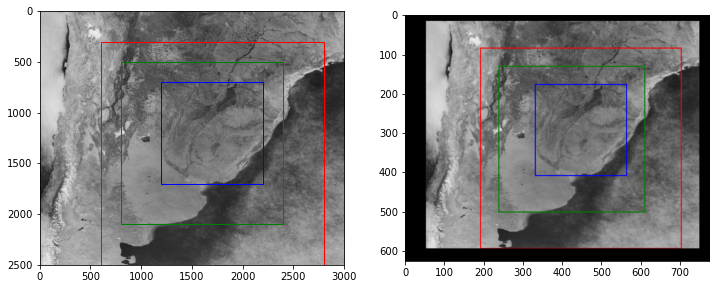

In [24]:
# I will take one picture of each day to grab one with no clouds to do the regions

# dataset_df = pd.read_csv('reports/dataset_2020.csv')

# img_90th_lst = []
# for nth_day in  dataset_df['Ordered list of images per dar']:
#     if len(nth_day.split(', ')) >= 91: # horrible, gotta fix this
#         img_90th_lst.append(nth_day.split(', ')[90].replace("'", ""))

# for day_minus_1, img_name in enumerate(img_90th_lst):
#     image = load_img(meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta',
#                     img_name=img_name,
#                     mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020',
#                     img_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020')
    
#     cv.imwrite('data/images/1_img4_each_day/' + str(img_name.replace(".FR", ".png")), image)

bkg = cv.imread('misc/bkg.png')

regions = cv.imread('data/regions.png')

fig, ax = plt.subplots(1, 2)

rect1 = patches.Rectangle((1200, 700), 1000, 1000, linewidth=1, edgecolor='b', facecolor='none') # xy, w, h
ax[0].add_patch(rect1)

rect2 = patches.Rectangle((800, 500), 1600, 1600, linewidth=1, edgecolor='g', facecolor='none')
ax[0].add_patch(rect2)

rect2 = patches.Rectangle((600, 300), 2200, 2200, linewidth=1, edgecolor='r', facecolor='none')
ax[0].add_patch(rect2)

ax[0].imshow(bkg)
ax[1].imshow(regions)
plt.show()

# 0 ------- x ------>
# |   x1         x2
# |
# y
# |
# |   y1         y2

# region 0 = no recortar
# region 1 = x=[600:2800], y=[300:2500] Size=2200x2200
# region 2 = x=[800:2400], y=[500:2100] Size=1600x1600
# region 3 = x=[1200:2200], y=[700:1700] Size=1000x1000

# With np arrays vs cv images the axes change, but the origin stays the same so i have to change x and y

(1600, 1600)


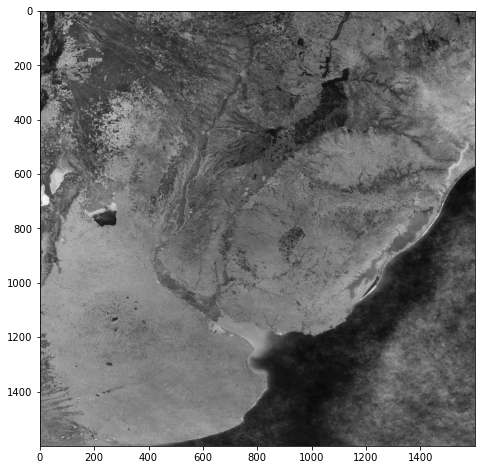

In [5]:
# img = np.asarray(cv.imread('misc/bkg.png')[:,:,0])
# np.save('misc/img/bkg.npy', img)

dataset = data.SatelliteImagesDataset(root_dir = 'misc/img/',
                                transform = CropImage(2))



sample = dataset[0]
image, time_stamp = sample['image'], sample['time_stamp']

print(image.shape)
fig, ax = plt.subplots()

plt.imshow(image, cmap='gray')
plt.show()